In [26]:
if ( ! exists("options_org")) {
    options_org <- options()
}

## The PDF
Plot the PDF of the binomial distribution the random variable $X \sim B(10,5)$.

[1] 0.0009765625 0.0097656250 0.0439453125 0.1171875000 0.2050781250
 [6] 0.2460937500 0.2050781250 0.1171875000 0.0439453125 0.0097656250
[11] 0.0009765625

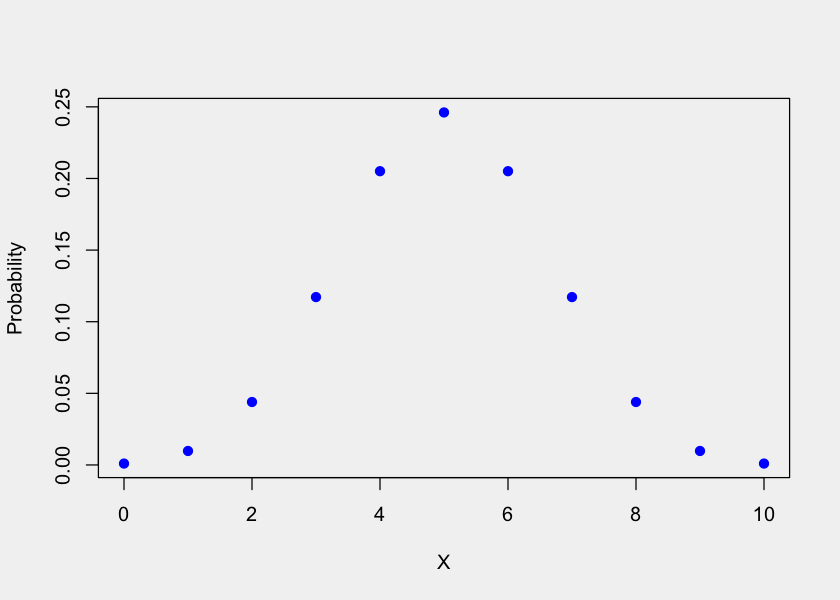

In [394]:
options(repr.plot.width=7, repr.plot.height=5)
n = 10
p = .5

x = seq(0, n)
px = dbinom(x, n, p)
px
par(bg = 'gray95') 
plot(x, px, pch=19, col='blue', xlab='X', ylab='Probability')

## The Distribution
Sample data for a random variable $X \sim B(n, p)$ and:
- Approximate $P(X \ge k)$ and $P(X < n - k)$ for $0 \le k \le n$.
- Plot the histogram of the distribution of the sampling data.

In [529]:
n=10
n_samples = 20
n_repeats = 100
sampling_proportion_u = sampling_proportion_l = rep(NA, n_repeats)
k = 10 # n*p = .5

cat('(n_samples, n, p) -> (', n_samples, ',', n, ',', p, ')\n\n')

for (i in 1:n_repeats) {
    rx = sort(rbinom(n_samples, n, p))
    sampling_proportion_u[i] = sum(rx >= k) / n_samples
    sampling_proportion_l[i] = sum(rx < n - k) / n_samples
    
    if (i <= min(10, n_repeats/2)) {
        cat(rx, ' -> u:', sampling_proportion_u[i], ' (l:' , sampling_proportion_l[i] , ') -> ', sampling_proportion_u[i] * n_samples, '\n')
    }
}
cat('...\n')

cat('P(X >= ', k, '):', mean(sampling_proportion_u), '\n')
cat('P(X < ', k, '):', mean(sampling_proportion_l), '\n')

(n_samples, n, p) -> ( 20 , 10 , 0.5 )

2 3 4 4 4 5 5 5 5 5 5 5 6 6 6 6 6 6 7 9  -> u: 0  (l: 0 ) ->  0 
1 2 2 2 3 4 4 4 4 5 5 5 5 5 6 6 6 7 7 7  -> u: 0  (l: 0 ) ->  0 
3 3 4 4 4 4 4 4 5 5 6 6 6 6 6 7 7 7 9 10  -> u: 0.05  (l: 0 ) ->  1 
2 2 3 3 3 4 4 4 5 5 5 5 6 6 7 7 7 7 7 7  -> u: 0  (l: 0 ) ->  0 
3 3 4 4 4 5 5 5 5 5 6 6 6 6 6 7 7 7 8 8  -> u: 0  (l: 0 ) ->  0 
2 3 3 3 4 4 4 4 4 4 5 5 5 5 5 6 6 7 7 7  -> u: 0  (l: 0 ) ->  0 
2 3 3 3 3 4 4 4 4 4 5 5 5 5 6 6 6 6 6 7  -> u: 0  (l: 0 ) ->  0 
2 3 3 3 3 3 4 5 5 5 5 5 5 5 6 6 6 7 7 7  -> u: 0  (l: 0 ) ->  0 
3 3 3 3 4 5 5 5 5 5 5 6 6 6 6 6 6 7 7 8  -> u: 0  (l: 0 ) ->  0 
2 3 3 4 4 4 4 5 5 6 6 6 6 6 6 6 6 7 7 7  -> u: 0  (l: 0 ) ->  0 
...
P(X >=  10 ): 0.002 
P(X <  10 ): 0 


## Effect of Sample Size
Keep $p$, $n$ and $n\_repeats$ fixed and try different values for $n\_samples$. Also try different values of $p$ and $n$.

In [613]:
p = .1
n=10
n_repeats = 100

(n_samples, n, p) -> ( 5 , 10 , 0.9 )



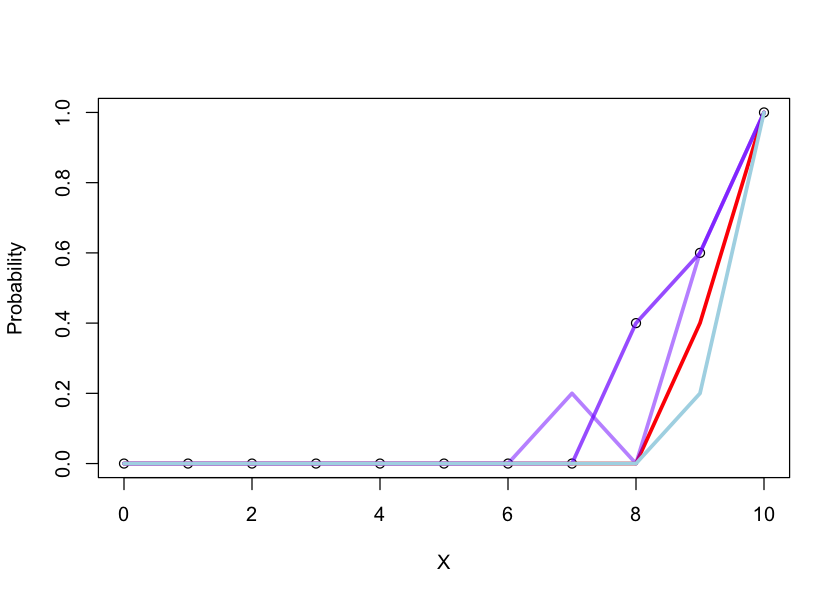

In [612]:
# small sample size
n_samples = 5
pc = rep(NA, n)
sampling_proportions = matrix( rep(NA, (n + 1) * n_repeats), ncol=(n+1))

cat('(n_samples, n, p) -> (', n_samples, ',', n, ',', p, ')\n\n')

for (k in 0:n) {
    for (i in 1:n_repeats) {
        rx = sort(rbinom(n_samples, n, p))
        sampling_proportions[, k+1][i] = sum(rx <= k) / n_samples
    }
}

plot(0:n, sampling_proportions[1, ], xlab='X', ylab='Probability')
points(0:n, sampling_proportions[2, ], col='red', type='l', lwd=3)
points(0:n, sampling_proportions[3, ], col=rgb(.5, .2, 1, .5), type='l', pch=16, lwd=3)
points(0:n, sampling_proportions[4, ], col=rgb(.5, .2, 1, .7), type='l', pch=16, lwd=3)
points(0:n, sampling_proportions[5, ], col='lightblue', type='l', pch=16, lwd=3)

(n_samples, n, p) -> ( 10 , 10 , 0.1 )



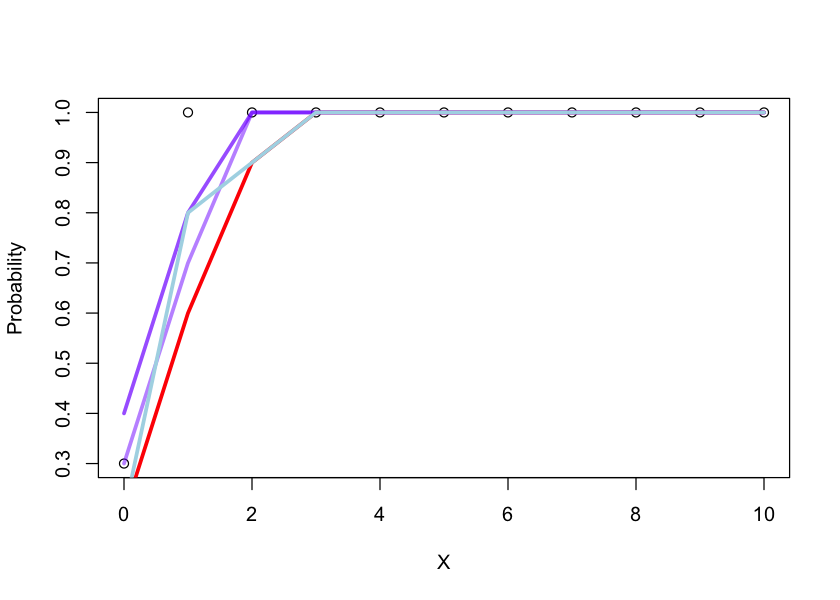

In [607]:
# a little larger
n_samples = 10

pc = rep(NA, n)
sampling_proportions = matrix( rep(NA, (n + 1) * n_repeats), ncol=(n+1))

cat('(n_samples, n, p) -> (', n_samples, ',', n, ',', p, ')\n\n')

for (k in 0:n) {
    for (i in 1:n_repeats) {
        rx = sort(rbinom(n_samples, n, p))
        sampling_proportions[, k+1][i] = sum(rx <= k) / n_samples
    }
}

plot(0:n, sampling_proportions[1, ], xlab='X', ylab='Probability')
points(0:n, sampling_proportions[2, ], col='red', type='l', lwd=3)
points(0:n, sampling_proportions[3, ], col=rgb(.5, .2, 1, .5), type='l', pch=16, lwd=3)
points(0:n, sampling_proportions[4, ], col=rgb(.5, .2, 1, .7), type='l', pch=16, lwd=3)
points(0:n, sampling_proportions[5, ], col='lightblue', type='l', pch=16, lwd=3)

(n_samples, n, p) -> ( 100 , 10 , 0.1 )



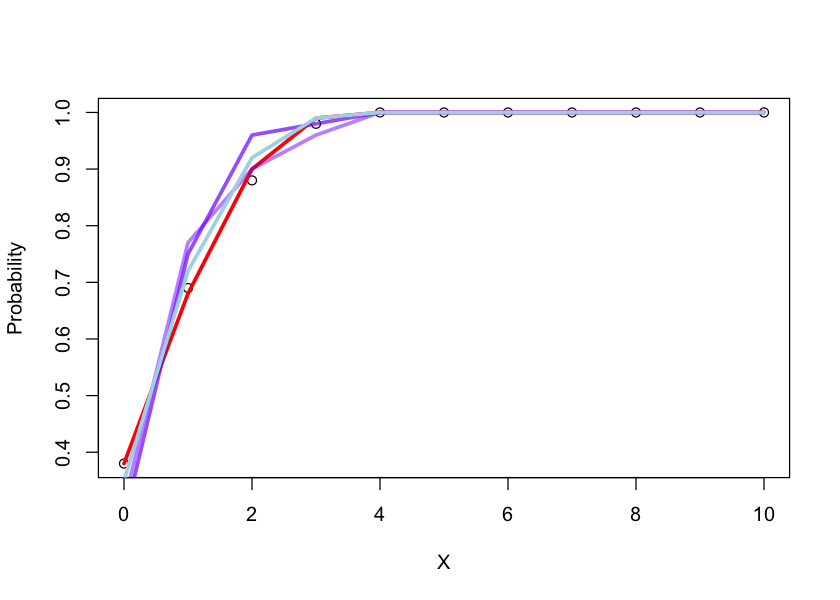

In [608]:
# relative large
n_samples = 100

pc = rep(NA, n)
sampling_proportions = matrix( rep(NA, (n + 1) * n_repeats), ncol=(n+1))

cat('(n_samples, n, p) -> (', n_samples, ',', n, ',', p, ')\n\n')

for (k in 0:n) {
    for (i in 1:n_repeats) {
        rx = sort(rbinom(n_samples, n, p))
        sampling_proportions[, k+1][i] = sum(rx <= k) / n_samples
    }
}

plot(0:n, sampling_proportions[1, ], xlab='X', ylab='Probability')
points(0:n, sampling_proportions[2, ], col='red', type='l', lwd=3)
points(0:n, sampling_proportions[3, ], col=rgb(.5, .2, 1, .5), type='l', pch=16, lwd=3)
points(0:n, sampling_proportions[4, ], col=rgb(.5, .2, 1, .7), type='l', pch=16, lwd=3)
points(0:n, sampling_proportions[5, ], col='lightblue', type='l', pch=16, lwd=3)

(n_samples, n, p) -> ( 1000 , 10 , 0.1 )



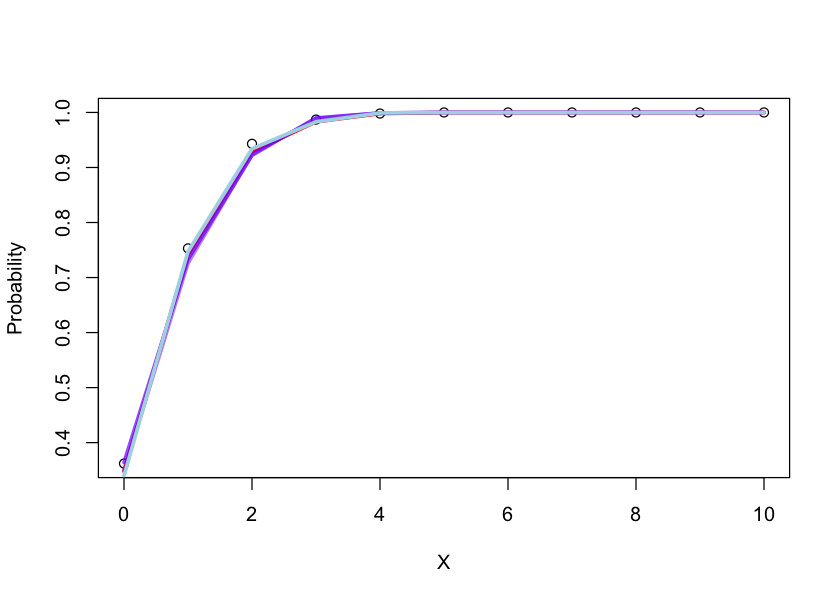

In [609]:
# quite large
n_samples = 1000

pc = rep(NA, n)
sampling_proportions = matrix( rep(NA, (n + 1) * n_repeats), ncol=(n+1))

cat('(n_samples, n, p) -> (', n_samples, ',', n, ',', p, ')\n\n')

for (k in 0:n) {
    for (i in 1:n_repeats) {
        rx = sort(rbinom(n_samples, n, p))
        sampling_proportions[, k+1][i] = sum(rx <= k) / n_samples
    }
}

plot(0:n, sampling_proportions[1, ], xlab='X', ylab='Probability')
points(0:n, sampling_proportions[2, ], col='red', type='l', lwd=3)
points(0:n, sampling_proportions[3, ], col=rgb(.5, .2, 1, .5), type='l', pch=16, lwd=3)
points(0:n, sampling_proportions[4, ], col=rgb(.5, .2, 1, .7), type='l', pch=16, lwd=3)
points(0:n, sampling_proportions[5, ], col='lightblue', type='l', pch=16, lwd=3)

### Data Inspection
Print the first $10$ or $n\_repeats$ (if $n\_repeats < 10$) rows in simulated data.

In [592]:
i=min(10, n_repeats)
sampling_proportions[1:i,]

0.0,0.2,0.6,1.0,1.0,1
0.0,0.0,0.2,0.8,1.0,1
0.0,0.4,0.4,0.8,1.0,1
0.2,0.2,0.8,1.0,1.0,1
0.0,0.6,0.6,1.0,1.0,1
0.2,0.2,0.8,0.8,0.8,1
0.0,0.0,0.2,0.8,0.8,1
0.0,0.0,0.8,0.4,1.0,1
0.0,0.4,0.4,0.6,1.0,1
0.0,0.0,0.4,0.8,1.0,1
